In [3]:
%matplotlib inline

# Logistic Regression
This notebook contains examples and code explainig how to use logistic regression for supervised learning.
The code is based on several examples from the internet - credits at the end of the notebook.

In [4]:
import matplotlib
import numpy as np
import pylab as plab
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn import datasets, linear_model

## 1) How to convert a non-linear problem into a linear problem

### Example of sigmoidal function

In [ ]:
plt.figure(figsize=(9,9))

# Define the sigmoid function
def sigmoid(x):                          
    return (1/(1 + np.e**(-x)))    

plot_range = np.arange(-6, 6, 0.1)       

In [ ]:
plot_range

In [ ]:
y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range, y_values, color="red")

### Example of a non-linear problem

In [ ]:
# Read the data
dfs = pd.read_excel('../Data/churn.xlsx', sheet_name=None)['Data']

In [ ]:
dfs.head()

In [ ]:
# Look at basics statistics
dfs.describe()

In [ ]:
#print(dfs[dfs['Churn'] != "NaN"])
copdfs = dfs.copy()
copdfs.dropna(thresh=3)
copdfs = copdfs[copdfs['Churn']!="nan"]

copdfs

In [132]:
# Filter out the empty values for the dependent variable
# dfs['Churn'] = dfs['Churn'].astype('str')
# mask = (dfs['Churn'] != 'NaN')
# dfs = dfs.loc[mask]

In [17]:
# Convert Churn into 0 = churn, 1 = loyal
# dfs['Churn'] = np.where(dfs['Churn'] == 'loyal',     # Logical check
#                        1,                            # Value if check is true
#                        0)                            # Value if check is false

In [ ]:
for i in range(0, dfs.shape[0]):
    if copdfs['Churn'][i] != 'loyal':
        copdfs['Churn'][i] = 0
    else:
        copdfs['Churn'][i] = 1

copdfs.head()

In [151]:
dfs_sample = dfs.sample(random_state=1, frac=0.01)

In [19]:
dfs_sample.size

50

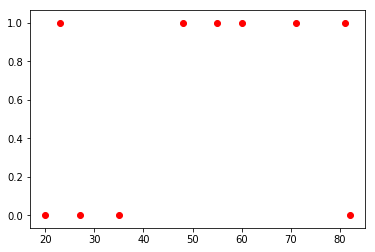

In [20]:
# Plot data, regression line
plt.figure(1)
plt.scatter(dfs_sample['Age'], dfs_sample['Churn'], color='r')
plt.show()

In [21]:
# Try to use linear regression first..
regr = linear_model.LinearRegression()

#Transform the array to avoid deprecation issues
age_x = dfs_sample['Age'].values.reshape(-1,1)

# Train the model using the training sets
regr.fit(age_x, dfs_sample['Churn'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

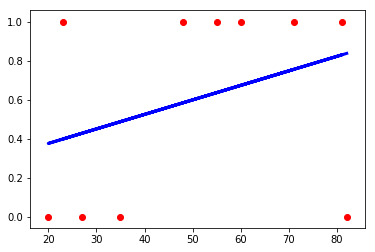

In [22]:
plt.plot(dfs_sample['Age'], regr.predict(age_x), color='blue', linewidth=3)
plt.scatter(dfs_sample['Age'], dfs_sample['Churn'], color='r')
plt.show()

In [23]:
# Do some binning
labels = [ "{0} - {1}".format(i, i+10) for i in range(16, 96, 10) ]
labels

['16 - 26',
 '26 - 36',
 '36 - 46',
 '46 - 56',
 '56 - 66',
 '66 - 76',
 '76 - 86',
 '86 - 96']

In [24]:
dfs['age_group'] = pd.cut(dfs["Age"], range(16, 106, 10), right=False, labels=labels)

In [25]:
total_count = dfs['age_group'].value_counts(sort=False)
total_count

16 - 26    166
26 - 36    174
36 - 46    188
46 - 56    188
56 - 66    111
66 - 76     85
76 - 86     61
86 - 96     23
Name: age_group, dtype: int64

In [26]:
churn_count = dfs.groupby('age_group', as_index=False)['Churn'].sum()['Churn']
churn_count = churn_count.round(0).astype(int)
churn_count.index = total_count.index

In [27]:
churn_count

16 - 26    122
26 - 36    117
36 - 46    100
46 - 56    103
56 - 66     54
66 - 76     39
76 - 86     29
86 - 96     14
Name: Churn, dtype: int32

In [28]:
percentage = churn_count/total_count
percentage.index = total_count.index

churn_count.name = "churn_count"
total_count.name = "total_count"
percentage.name = "percentage"

In [29]:
percent = pd.concat([churn_count, total_count, percentage], axis=1).iloc[0:]
sorted = percent.sort_values(['percentage'], ascending=[1])

In [30]:
percent

,churn_count,total_count,percentage
16 - 26,122,166,0.734940
26 - 36,117,174,0.672414
36 - 46,100,188,0.531915
46 - 56,103,188,0.547872
56 - 66,54,111,0.486486
66 - 76,39,85,0.458824
76 - 86,29,61,0.475410
86 - 96,14,23,0.608696


In [31]:
plab.figure(1)
x_range = list(range(8)[0:])
y_range = np.linspace(0,1,8,endpoint=False)

<Figure size 432x288 with 0 Axes>

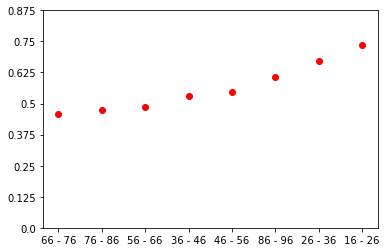

In [32]:
plab.scatter(x_range, sorted["percentage"].tolist(), color='r')
plab.xticks(x_range, sorted.index.format())
plab.yticks(y_range, y_range)
plab.show()

## 2) Example of Binary Classifier

### Import the data

In [36]:
titanic_train = pd.read_csv("../Data/titanic_train.csv")

In [37]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [38]:
#Clean the data for missing values (NaN) in Cabin
char_cabin = titanic_train["Cabin"].astype(str)     # Convert cabin to str
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter
titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

In [39]:
# Impute median Age (28) for missing (NA) Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                            # Value if check is true
                       titanic_train["Age"])          # Value if check is false

In [40]:
titanic_train["Age"] = new_age_var 

### Train the model

In [41]:
from sklearn import linear_model
from sklearn import preprocessing

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

In [42]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs')

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = titanic_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
# Check trained model intercept
b = log_model.intercept_
print(b)

# Check trained model coefficients
m = log_model.coef_
print(m)

[0.96150701]
[[-2.29505154]]


### Make prediction

In [44]:
preds = log_model.predict_proba(X=pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]

In [45]:
# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], preds.loc[:, "Survival_prob"])

Survival_prob,0.20857366240396785,0.7234234317816377
Sex,,
female,0,218
male,361,0


In [46]:
# Convert more variables to numeric
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])

In [47]:
train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["Age"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs')

# Train the model
log_model.fit(X = train_features ,
              y = titanic_train["Survived"])

# Check trained model intercept
#print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[[-0.9953219  -0.14845839 -2.41354363 -0.03912171]]


In [48]:
# Make predictions
preds = log_model.predict(X=train_features)

In [49]:
# Generate table of predictions vs actual
pd.crosstab(preds,titanic_train["Survived"])

Survived,0,1
row_0,,
0,281,55
1,65,178


In [50]:
#Calculating the accuracy
(282+173)/889

0.5118110236220472

In [51]:
log_model.score(X = train_features ,
                y = titanic_train["Survived"])

0.7927461139896373

In [52]:
from sklearn import metrics

In [53]:
# View confusion matrix
metrics.confusion_matrix(y_true=titanic_train["Survived"],  # True labels
                         y_pred=preds) # Predicted labels

array([[281,  65],
       [ 55, 178]], dtype=int64)

In [54]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                              y_pred=preds) )

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       346
           1       0.73      0.76      0.75       233

   micro avg       0.79      0.79      0.79       579
   macro avg       0.78      0.79      0.79       579
weighted avg       0.79      0.79      0.79       579



In [61]:
# Read and prepare test data
titanic_test = pd.read_csv("../Data/titanic_test.csv")    # Read the data

char_cabin = titanic_test["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_test["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_test["Age"])      # Value if check is false

titanic_test["Age"] = new_age_var 

In [62]:
# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])

test_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_test["Age"]]).T

In [63]:
# Make test set predictions
test_preds = log_model.predict(X=test_features)

# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Save submission to CSV
submission.to_csv("tutorial_logreg_submission.csv", 
                  index=False)        # Do not save index values

log_model.score(X = test_features ,
                y = titanic_test["Survived"])

0.8044871794871795

## 3) Example of a 3-class Classifier

Below is a logistic-regression classifiers decision boundaries on the
`iris <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ dataset. The
datapoints are colored according to their labels.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [65]:
## Import dataset on Iris flowers

In [66]:
iris = datasets.load_iris()
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [67]:
X = iris.data[:, :2] #We take only the first two variables as predictors: sepal length and sepal width.
Y = iris.target

Text(0, 0.5, 'Sepal width')

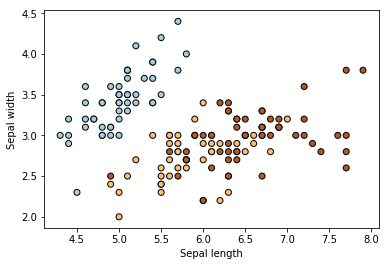

In [68]:
# Plot the training points
plt.figure(1, figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

### Create an instance of Neighbours Classifier and fit the data.

In [69]:
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto') # 1e5 = 1000,0.. C is an option for the LogisticRegression function
logreg.fit(X, Y)
#if this isnt working just vemove multiclass
#print(type(1e5), 1e5)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### Plot the decision boundary

In [70]:
# We will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
xx.ravel()

array([3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ])

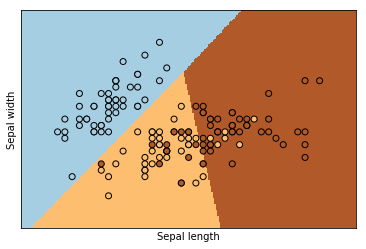

In [71]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

### Credits:
[Greg Hamel](http://hamelg.blogspot.no/2015/11/python-for-data-analysis-part-28.html)
[Gaël Varoquaux & Jaques Grobler](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
